In [16]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

from sklearn import datasets
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris, load_wine
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    roc_auc_score, confusion_matrix
)


Explained variance ratio for each component: ^-^
  PC1: 0.9246
  PC2: 0.0531
  PC3: 0.0171
  PC4: 0.0052

Cumulative explained variance: ^-^
  First 1 PCs: 0.9246
  First 2 PCs: 0.9777
  First 3 PCs: 0.9948
  First 4 PCs: 1.0000


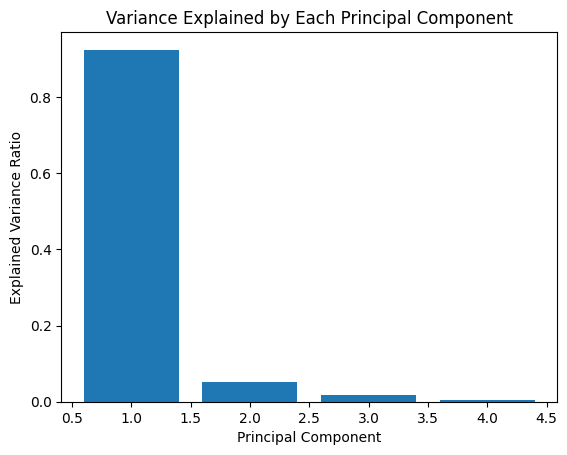

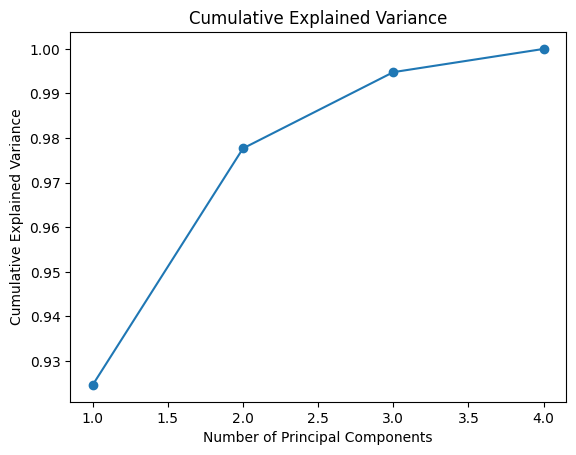

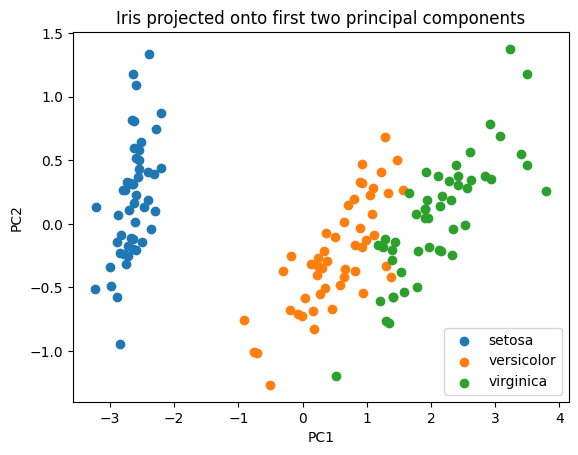

In [17]:
'''
Q1)Apply the PCA feature extraction to reduce the 4 dimensional iris data (original iris) into 2
dimensions (new iris). Analyze the variance explained by all the principal components.
'''

iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

# 1. Analyze variance explained by all principal components
pca_full = PCA(n_components=4)
pca_full.fit(X)
explained_variance = pca_full.explained_variance_ratio_
cum_variance = explained_variance.cumsum()

print("Explained variance ratio for each component: ^-^")
for i, var in enumerate(explained_variance, start=1):
    print(f"  PC{i}: {var:.4f}")
print("\nCumulative explained variance: ^-^")
for i, cum_var in enumerate(cum_variance, start=1):
    print(f"  First {i} PCs: {cum_var:.4f}")


plt.figure()
plt.bar(range(1, 5), explained_variance)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Variance Explained by Each Principal Component')
plt.show()


plt.figure()
plt.plot(range(1, 5), cum_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')
plt.show()

# 2. Reduce to 2 dimensions
pca2 = PCA(n_components=2)
X_new = pca2.fit_transform(X)


plt.figure()
for species in np.unique(y):
    mask = (y == species)
    plt.scatter(X_new[mask, 0], X_new[mask, 1], label=iris.target_names[species])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.title('Iris projected onto first two principal components')
plt.show()

In [ ]:
'''
Q2) Compare the performance of random forest, SVM, and logistic regression classifiers with respect
to accuracy, recall, precision, FPR, and ROC metrics for original iris and new iris datasets. Hint:
the datasets can be loaded using sklearn.datasets.load function.
'''

iris = load_iris()
X = iris.data
y = iris.target

#  2D PCA dataset
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)


X_train_orig, X_test_orig, y_train, y_test = train_test_split(X, y,
                                                              test_size=0.3, random_state=42, 
                                                              stratify=y)
X_train_pca, X_test_pca, _, _ = train_test_split(X_pca, y, 
                                                 test_size=0.3, random_state=42, 
                                                 stratify=y)

classifiers = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42)
}


def compute_metrics(clf, X_test, y_test):
    y_pred = clf.predict(X_test)
    y_proba = clf.predict_proba(X_test)

    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro')
    rec = recall_score(y_test, y_pred, average='macro')

    # fpr
    cm = confusion_matrix(y_test, y_pred)
    fpr_list = []
    for i in range(len(cm)):
        FP = cm[:, i].sum() - cm[i, i]
        TN = cm.sum() - (cm[i, :].sum() + cm[:, i].sum() - cm[i, i])
        fpr_list.append(FP / (FP + TN))
    fpr = np.mean(fpr_list)

    roc_auc = roc_auc_score(y_test, y_proba, multi_class='ovr', average='macro')

    return acc, prec, rec, fpr, roc_auc


results = []
for name, clf in classifiers.items():
    # Original data
    clf.fit(X_train_orig, y_train)
    res_orig = compute_metrics(clf, X_test_orig, y_test)
    results.append((name, 'Original', *res_orig))

    # PCA-reduced data
    clf.fit(X_train_pca, y_train)
    res_pca = compute_metrics(clf, X_test_pca, y_test)
    results.append((name, 'PCA-2D', *res_pca))

df_results = pd.DataFrame(
    results,
    columns=['Classifier', 'Dataset', 'Accuracy', 'Precision', 'Recall', 'FPR', 'ROC AUC']
)
df_results


,Classifier,Dataset,Accuracy,Precision,Recall,FPR,ROC AUC
0,Random Forest,Original,0.888889,0.898148,0.888889,0.055556,0.988889
1,Random Forest,PCA-2D,0.911111,0.915535,0.911111,0.044444,0.991852
2,SVM,Original,0.955556,0.955556,0.955556,0.022222,0.995556
3,SVM,PCA-2D,0.911111,0.915535,0.911111,0.044444,0.995556
4,Logistic Regression,Original,0.933333,0.934524,0.933333,0.033333,0.995556
5,Logistic Regression,PCA-2D,0.911111,0.915535,0.911111,0.044444,0.991111


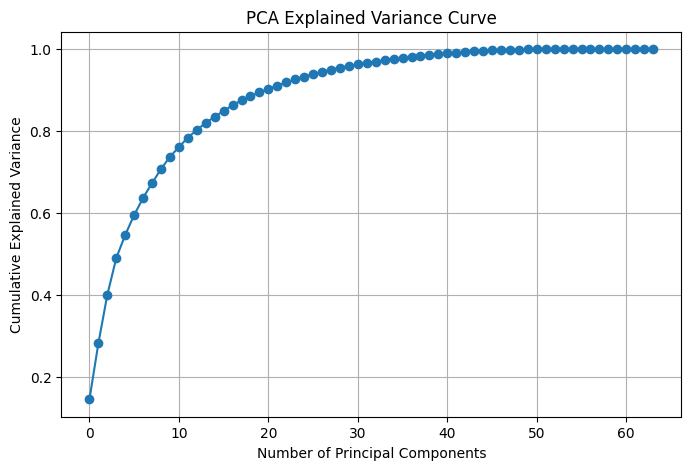

=== Classification Results ===


,PCA_setting,Classifier,Accuracy,Recall,Precision,FPR,ROC_AUC,Explained_Var
0,0.90,RandomForest,0.970370,0.969939,0.971386,0.003315,0.998598,0.903154
1,0.90,SVM,0.988889,0.988709,0.989217,0.001239,0.999477,0.903154
2,0.90,LogisticRegression,0.931481,0.931314,0.932220,0.007691,0.997195,0.903154
3,0.95,RandomForest,0.968519,0.968155,0.969808,0.003526,0.998999,0.950086
4,0.95,SVM,0.988889,0.988709,0.989158,0.001240,0.999624,0.950086
5,0.95,LogisticRegression,0.953704,0.953544,0.954288,0.005192,0.998293,0.950086
6,0.99,RandomForest,0.975926,0.975742,0.976112,0.002686,0.998946,0.990316
7,0.99,SVM,0.990741,0.990561,0.991158,0.001035,0.999691,0.990316
8,0.99,LogisticRegression,0.957407,0.957143,0.957361,0.004772,0.998962,0.990316
9,10.00,RandomForest,0.964815,0.964485,0.965403,0.003936,0.998476,0.737825


In [19]:
''' 
Q3) Compare the performance of random forest, SVM, and logistic regression classifiers with respect
to accuracy, recall, precision, FPR, and ROC metrics for reduced digits dataset by keeping
n_components=0.9, 0.95, 0.99, 10, 30, 40, and 50 in PCA technique. Analyze the variance
explained by all the principal components.
'''

digits = datasets.load_digits()
X, y = digits.data, digits.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

pca_settings = [0.9, 0.95, 0.99, 10, 30, 40, 50]

classifiers = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'LogisticRegression': LogisticRegression(max_iter=10000, random_state=42)
}

results = []

for n in pca_settings:
    # fit PCA
    pca = PCA(n_components=n, random_state=42)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    total_var = np.sum(pca.explained_variance_ratio_)
    cum_var = np.cumsum(pca.explained_variance_ratio_)

    for name, clf in classifiers.items():
        clf.fit(X_train_pca, y_train)
        y_pred = clf.predict(X_test_pca)
        y_prob = clf.predict_proba(X_test_pca)

        acc = accuracy_score(y_test, y_pred)
        rec = recall_score(y_test, y_pred, average='macro')
        prec = precision_score(y_test, y_pred, average='macro')

        cm = confusion_matrix(y_test, y_pred)
        # For multiclass, approximate FPR = FP / (FP + TN) for each class
        fps = cm.sum(axis=0) - np.diag(cm)
        tns = cm.sum() - (cm.sum(axis=1) + cm.sum(axis=0) - np.diag(cm))
        fpr_per_class = fps / tns
        fpr = np.mean(fpr_per_class)

        auc = roc_auc_score(
            pd.get_dummies(y_test), y_prob, average='macro'
        )

        results.append({
            'PCA_setting': n,
            'Classifier': name,
            'Accuracy': acc,
            'Recall': rec,
            'Precision': prec,
            'FPR': fpr,
            'ROC_AUC': auc,
            'Explained_Var': total_var
        })


df_results = pd.DataFrame(results)

pca_full = PCA(n_components=None, random_state=42)
pca_full.fit(X_train)
cum_var_full = np.cumsum(pca_full.explained_variance_ratio_)
plt.figure(figsize=(8, 5))
plt.plot(cum_var_full, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance Curve')
plt.grid(True)
plt.show()

print("=== Classification Results ===")
df_results


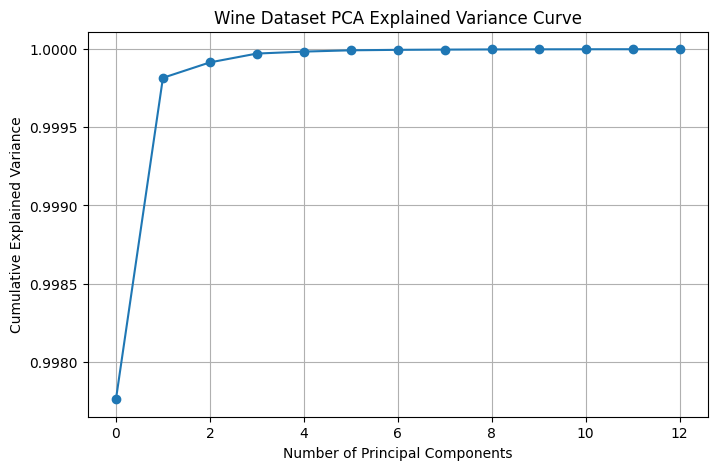

,PCA_setting,Classifier,Accuracy,Recall,Precision,FPR,ROC_AUC,Explained_Var
0,0.90,RandomForest,0.629630,0.618519,0.622579,0.234355,0.837679,0.997759
1,0.90,SVM,0.703704,0.706349,0.723681,0.183894,0.895526,0.997759
2,0.90,LogisticRegression,0.666667,0.630159,0.619514,0.225141,0.893817,0.997759
3,0.95,RandomForest,0.629630,0.618519,0.622579,0.234355,0.837679,0.997759
4,0.95,SVM,0.703704,0.706349,0.723681,0.183894,0.895526,0.997759
5,0.95,LogisticRegression,0.666667,0.630159,0.619514,0.225141,0.893817,0.997759
6,0.99,RandomForest,0.629630,0.618519,0.622579,0.234355,0.837679,0.997759
7,0.99,SVM,0.703704,0.706349,0.723681,0.183894,0.895526,0.997759
8,0.99,LogisticRegression,0.666667,0.630159,0.619514,0.225141,0.893817,0.997759
9,2.00,RandomForest,0.740741,0.728042,0.729197,0.154288,0.886521,0.999817


In [ ]:
'''
Q6) Compare the performance of random forest, SVM, and logistic regression classifiers with respect
to accuracy, recall, precision, FPR, and ROC metrics for reduced wine dataset by keeping
n_components=0.9, 0.95, 0.99, 2, 5, 8, and 10 in PCA technique. Analyze the variance explained
by all the principal components.
'''

wine = datasets.load_wine()
X, y = wine.data, wine.target


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


pca_settings = [0.9, 0.95, 0.99, 2, 5, 8, 10]

classifiers = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'LogisticRegression': LogisticRegression(max_iter=10000, random_state=42)
}


results = []

for n in pca_settings:

    pca = PCA(n_components=n, random_state=42)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)


    total_var = np.sum(pca.explained_variance_ratio_)

    for name, clf in classifiers.items():

        clf.fit(X_train_pca, y_train)
        y_pred = clf.predict(X_test_pca)
        y_prob = clf.predict_proba(X_test_pca)

        acc = accuracy_score(y_test, y_pred)
        rec = recall_score(y_test, y_pred, average='macro')
        prec = precision_score(y_test, y_pred, average='macro')

        cm = confusion_matrix(y_test, y_pred)
        fps = cm.sum(axis=0) - np.diag(cm)
        tns = cm.sum() - (cm.sum(axis=1) + cm.sum(axis=0) - np.diag(cm))
        fpr_per_class = fps / tns
        fpr = np.mean(fpr_per_class)
   
        auc = roc_auc_score(
            pd.get_dummies(y_test), y_prob, average='macro'
        )

        results.append({
            'PCA_setting': n,
            'Classifier': name,
            'Accuracy': acc,
            'Recall': rec,
            'Precision': prec,
            'FPR': fpr,
            'ROC_AUC': auc,
            'Explained_Var': total_var
        })


df_results = pd.DataFrame(results)

pca_full = PCA(n_components=None, random_state=42)
pca_full.fit(X_train)
cum_var_full = np.cumsum(pca_full.explained_variance_ratio_)
plt.figure(figsize=(8, 5))
plt.plot(cum_var_full, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Wine Dataset PCA Explained Variance Curve')
plt.grid(True)
plt.show()

df_results
